# Feature Selection Examples

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/feature_selection.ipynb)

### Google Colab Configuration

In [ ]:
!git clone https://github.com/slickml/slick-ml.git
%cd slick-ml
!pip install -r requirements.txt

### Local Environment Configuration

In [1]:
# Change path to project root
%cd ..

/home/amirhessam/Documents/GitHub/slick-ml


### Import Python Libraries

In [2]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%autoreload
from slickml.feature_selection import XGBoostFeatureSelector

_______
# XGBoostFeatureSelector

## Example 1

In [4]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

F1   F2   F3    F4      F5      F6  CLASS
0  5.7  4.7  3.7  58.0  249.30  456.47      0
1  7.7  6.6  4.1  20.0  260.92  443.43      1
2  6.2  4.3  4.6  59.0  255.63  478.96      1
3  5.7  4.4  3.8  49.0  195.28  381.94      0
4  9.1  4.7  4.6  17.0  259.55  395.67      1

In [5]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [6]:
%autoreload
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

xfs = XGBoostFeatureSelector(n_iter=4, sparse_matrix=True, params=params)

In [7]:
help(xfs)

Help on XGBoostFeatureSelector in module slickml.feature_selection object:

class XGBoostFeatureSelector(builtins.object)
 |  XGBoostFeatureSelector(n_iter=None, num_boost_round=None, n_splits=None, metrics=None, early_stopping_rounds=None, random_state=None, stratified=True, shuffle=True, sparse_matrix=False, nth_noise_threshold=None, show_stdv=False, importance_type=None, params=None, verbose_eval=False, callbacks=False)
 |  
 |  XGBoost Feature Selector.
 |  This is wrapper using XGBoost classifier to run xgboost.cv()
 |  model with n-folds cross-validation on top of augmented data
 |  with noisy features iteratively. At each n-fold CV of each iteration,
 |  it finds the best boosting round to overcome the over-fitting and
 |  run xgboost.train(). Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 |  Parameters
 |  ----------
 |  n_iter: int, optional (default=3)
 |      Number of iteration for feature selection
 |  num_boost

In [8]:
# run feature selection
xfs.fit(X, y)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 1 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train AUC = 0.929 -- Test AUC = 0.836 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train AUC = 0.934 -- Test AUC = 0.826 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 3/4 -- Train AUC = 0.923 -- Test AUC = 0.906 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 4/4 -- Train AUC = 0.937 -- Test AUC = 0.833 *-*-*-*-*-*-*-*-*-*-*-*
*-*-* Internal 4-Folds CV: -*-*- Train AUC = 0.941 +/- 0.004 -*-*- Test AUC = 0.852 +/- 0.015 *-*-*
*-*-* External 4-Folds CV: -*-*- Train AUC = 0.931 +/- 0.005 -*-*- Test AUC = 0.850 +/- 0.032 *-*-*

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 2 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train AUC = 0.918 -- Test AUC = 0.860 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train AUC = 0.935 -- Test AUC = 0.874 *-*-*-*-*-*-*-*-*-*-*-*

In [9]:
X.head()

F1   F2   F3    F4      F5      F6
0  5.7  4.7  3.7  58.0  249.30  456.47
1  7.7  6.6  4.1  20.0  260.92  443.43
2  6.2  4.3  4.6  59.0  255.63  478.96
3  5.7  4.4  3.8  49.0  195.28  381.94
4  9.1  4.7  4.6  17.0  259.55  395.67

In [10]:
# get feature freq
# or xfs.feature_frequency_ 
xfs.get_feature_frequency()

Feature  Frequency  Frequency (%)
0      F1       16.0         100.00
1      F2       16.0         100.00
2      F5       16.0         100.00
3      F6       16.0         100.00
4      F3       13.0          81.25
5      F4        3.0          18.75

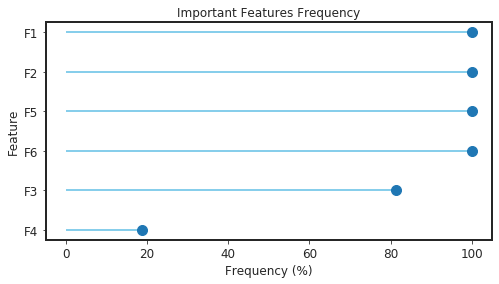

In [11]:
xfs.plot_frequency()

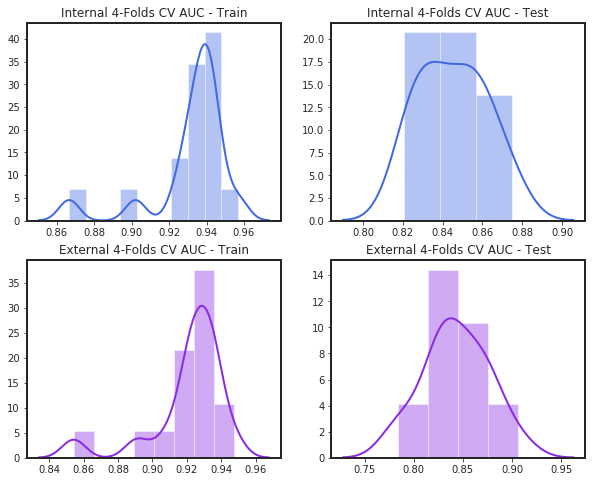

In [12]:
xfs.plot_cv_results()

In [13]:
# getting feature importance for each model
# or imps = xfs.feature_importance_
imps = xfs.get_feature_importance()
for key, val in imps.items():
    print(F"--- {key} ---")
    display(imps[key].head(5))

--- model_iter1_fold1 ---


feature  total_gain
0      F1  848.890786
1      F6  464.927764
2      F2  340.022567
3      F5  291.031334
4      F3   77.224888

--- model_iter1_fold2 ---


feature   total_gain
0        F1  1019.154560
1        F6   460.276461
2        F2   410.280878
3        F5   269.946970
4  noisy_F4    88.573590

--- model_iter1_fold3 ---


feature  total_gain
0      F1  931.355906
1      F6  442.526831
2      F2  298.036228
3      F5  283.651314
4      F3   52.402905

--- model_iter1_fold4 ---


feature  total_gain
0      F1  949.054845
1      F6  643.124486
2      F2  339.711300
3      F5  203.826883
4      F3  149.798188

--- model_iter2_fold1 ---


feature  total_gain
0      F1  756.907810
1      F6  455.236496
2      F2  283.091866
3      F5  197.914370
4      F3   39.327658

--- model_iter2_fold2 ---


feature  total_gain
0      F1  782.958552
1      F2  375.976463
2      F6  367.191337
3      F5  328.392649
4      F3  134.776531

--- model_iter2_fold3 ---


feature   total_gain
0      F1  1171.111478
1      F6   520.026925
2      F2   376.577674
3      F5   317.294273
4      F3    52.748300

--- model_iter2_fold4 ---


feature  total_gain
0        F1  868.979814
1        F6  413.774690
2        F2  276.586677
3        F5  252.686966
4  noisy_F5   51.710637

--- model_iter3_fold1 ---


feature  total_gain
0      F1  939.135108
1      F6  822.818343
2      F2  278.213139
3      F5  160.811484
4      F3   74.261048

--- model_iter3_fold2 ---


feature  total_gain
0      F1  723.506578
1      F2  278.702467
2      F6  232.915988
3      F5  169.315446
4      F3   59.154142

--- model_iter3_fold3 ---


feature  total_gain
0      F1  858.596503
1      F5  466.486348
2      F6  335.912011
3      F2  315.461856
4      F3   14.802910

--- model_iter3_fold4 ---


feature  total_gain
0      F1  471.537064
1      F6  222.162107
2      F5  137.448887
3      F2   87.596352
4      F3    7.178787

--- model_iter4_fold1 ---


feature  total_gain
0      F1  879.543783
1      F5  441.650384
2      F2  335.236739
3      F6  303.170103
4      F3   80.038845

--- model_iter4_fold2 ---


feature  total_gain
0      F1  973.576141
1      F6  638.150715
2      F2  235.519563
3      F5  216.898467
4      F3  100.375051

--- model_iter4_fold3 ---


feature  total_gain
0      F1  945.157294
1      F6  494.422609
2      F5  261.578358
3      F2  203.888573
4      F4    4.179382

--- model_iter4_fold4 ---


feature  total_gain
0      F1  802.306549
1      F2  410.388713
2      F6  320.825332
3      F5  203.252508
4      F3   90.109855

In [14]:
# get cv results
# or xfs.cv_results_ 
xfs.get_cv_results()

int_cv_train  int_cv_test  ext_cv_train  ext_cv_test
0       0.938551     0.845518      0.929062     0.836303
1       0.942978     0.870445      0.933774     0.826083
2       0.936668     0.831651      0.923304     0.905767
3       0.946995     0.859594      0.937257     0.832525
4       0.929796     0.842012      0.917812     0.860238
5       0.942211     0.828253      0.934678     0.873777
6       0.957021     0.874884      0.947256     0.787535
7       0.936404     0.824035      0.924914     0.874483
8       0.941885     0.859411      0.932803     0.830363
9       0.902006     0.834991      0.890992     0.784504
10      0.930324     0.855990      0.923735     0.864891
11      0.866558     0.820689      0.854313     0.818239
12      0.942689     0.825196      0.935208     0.880328
13      0.938977     0.856045      0.926117     0.850454
14      0.933349     0.853149      0.919228     0.823049
15      0.923955     0.839091      0.907378     0.839892